In [0]:
!pip install -U -q PyDrive
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

    100% |████████████████████████████████| 993kB 21.9MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip -q /content/gdrive/My\ Drive/BigData/data/train.csv.zip 

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

dataPreparation = drive.CreateFile({'id':'1_FwvAUOGuHrzZo9BPrT8vUN7NzdiyiJ2'})
dataPreparation.GetContentFile('dataPreparation.py')

constants = drive.CreateFile({'id':'19gmw2h2VRgJC3O2RysRQ4zPWvoIJxQCY'})
constants.GetContentFile('constants.py')

utils = drive.CreateFile({'id':'1MXNAGTilvvyXG8wtxcPAo5aRK3cMElE1'})
utils.GetContentFile('utils.py')


lightGBM = drive.CreateFile({'id':'15sXwdEt4036VqIa0kKwdrErRe6Pta-Fx'})
lightGBM.GetContentFile('lightGBM.py')



In [0]:
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import dataPreparation
import constants
import utils
import lightGBM


train,test = dataPreparation.readAndCleanData('./train.csv','/content/gdrive/My Drive/BigData/data/test.csv')
print("Shape of Training Data after cleaning ",train.shape)
print("Shape of Testing Data after cleaning", test.shape)

xTrain, xTest, yTrain, yTest \
=dataPreparation.prepareDataForModel(train,'fare_amount',dropCols=['key','pickup_datetime'],isTrain=True,split=0.2)


testData=dataPreparation.prepareDataForModel(test,'fare_amount',dropCols=['key','pickup_datetime'],isTrain=False)


# Add feature engineering to the data.

#xTest=dataPreparation.addFeatureEngineering(xTest)
#print("end2")
#xTrain=dataPreparation.addFeatureEngineering(xTrain)
#print("end1")
#testData=dataPreparation.addFeatureEngineering(testData)
#print("end3")




xTrain=pd.read_csv("/content/gdrive/My Drive/BigData/data/X_train_cleaned.csv")
xTest=pd.read_csv("/content/gdrive/My Drive/BigData/data/X_test_cleaned.csv")
#testData=pd.read_csv("/content/gdrive/My Drive/BigData/data/test_cleaned.csv")

#xTrain.to_csv("X_train_cleaned.csv",index=False)
#xTest.to_csv("X_test_cleaned.csv",index=False)
#testData.to_csv("test_cleaned.csv",index=False)


/content/dataPreparation.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
/content/dataPreparation.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['pickup_day']=data['pickup_datetime'].apply(lambda x:x.day)
/content/dataPreparation.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

Shape of Training Data after cleaning  (2935680, 13)
Shape of Testing Data after cleaning (9914, 12)
Shape of Training Features (2348544, 10)
Shape of Validation Features  (587136, 10)
Shape of Test Data (9914, 10)


In [0]:
print(xTrain.dtypes)

pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
pickup_day                         int64
pickup_hour                        int64
pickup_day_of_week                 int64
pickup_month                       int64
pickup_year                        int64
is_pickup_la_guardia               int64
is_dropoff_la_guardia              int64
is_pickup_EWR                      int64
is_dropoff_EWR                     int64
is_pickup_JFK                      int64
is_dropoff_JFK                     int64
pickup_borough                     int64
dropoff_borough                    int64
is_pickup_lower_manhattan          int64
is_dropoff_lower_manhattan         int64
pickup_distance_jfk              float64
dropoff_distance_jfk             float64
pickup_distance_ewr              float64
dropoff_distance_ewr             float64
pickup_distance_

In [0]:
# TODO: Call model training and testing here.
import lightGBM

lgbBst=lightGBM.getTrainedLgbModel(xTrain,yTrain)


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	cv_agg's rmse: 4.24129 + 0.0952098
[40]	cv_agg's rmse: 3.91965 + 0.0980678
[60]	cv_agg's rmse: 3.83337 + 0.094524
[80]	cv_agg's rmse: 3.78046 + 0.0922486
[100]	cv_agg's rmse: 3.74526 + 0.0929537
[120]	cv_agg's rmse: 3.7197 + 0.0932599
[140]	cv_agg's rmse: 3.69924 + 0.0943386
[160]	cv_agg's rmse: 3.68528 + 0.0944051
[180]	cv_agg's rmse: 3.67445 + 0.0929822
[200]	cv_agg's rmse: 3.66409 + 0.0930177
[220]	cv_agg's rmse: 3.65435 + 0.092337
[240]	cv_agg's rmse: 3.64763 + 0.0922133
[260]	cv_agg's rmse: 3.64043 + 0.0919493
[280]	cv_agg's rmse: 3.63495 + 0.0914859
[300]	cv_agg's rmse: 3.6305 + 0.0916758
[320]	cv_agg's rmse: 3.62662 + 0.0913677
[340]	cv_agg's rmse: 3.62239 + 0.0911705
[360]	cv_agg's rmse: 3.61849 + 0.0918384
[380]	cv_agg's rmse: 3.615 + 0.0913827
[400]	cv_agg's rmse: 3.61195 + 0.0915888
[420]	cv_agg's rmse: 3.60906 + 0.0917919
[440]	cv_agg's rmse: 3.60627 + 0.0918416
[460]	cv_agg's rmse: 3.60308 + 0.0913641
[480]	cv_agg's rmse: 3.60058 + 0.0911176
[500]	cv_agg's rmse: 3.598

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSE for Light GBM is  3.5423656060877784
Train RMSE for Light GBM is  2.7109276023486064
Variance of Light GBM is  -0.831438003739172


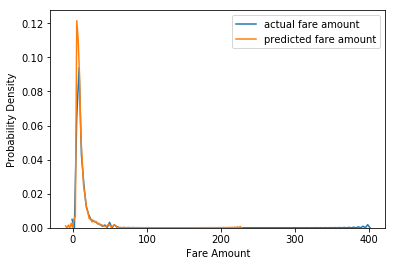

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xlabel('Fare Amount')
plt.ylabel('Probability Density')
validPred=lightGBM.predictAndEvaluateModel(lgbBst,xTest,yTest,xTrain,yTrain)
sns.kdeplot(yTest,label='actual fare amount')
sns.kdeplot(validPred,label='predicted fare amount')

In [0]:
%%capture

# Paramters tuning.
import lightgbm as lgb
from hyperopt.mongoexp import MongoTrials
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import mean_squared_error

def objective(space):
  
    clf = lgb.LGBMRegressor(
          objective = 'regression',
          n_jobs = -1, # Updated from 'nthread'
          verbose=1,
          learning_rate = space['x_learning_rate'],
          boosting_type='gbdt',
          num_leaves=int(space['x_num_leaves']),
          subsample_freq=int(space['x_subsample_freq']),
          max_depth=int(space['max_depth']),
          subsample=space['subsample'],
          n_estimators=int(space['x_n_estimators']),
          colsample_bytree=space['colsample'])
         

    eval_set=[( xTrain, yTrain), ( xTest,yTest)]

    clf.fit(xTrain, np.array(yTrain),
            eval_set=eval_set,eval_metric='rmse',
            early_stopping_rounds=20)

    pred = clf.predict(xTest)
    rmse = np.sqrt(mean_squared_error(yTest, pred))
    print("SCORE:", rmse)

    return{'loss':rmse, 'status': STATUS_OK }
  
  
space ={
        'max_depth': hp.quniform("x_max_depth", 5, 30, 3),
        'subsample': hp.uniform ('x_subsample', 0.8, 1),
        'colsample':hp.uniform ('x_colsample', 0.3, 1),
        'learning_rate':hp.uniform ('x_learning_rate',0.005,0.75),
        'num_leaves':hp.quniform("x_num_leaves",30,60,5),
        'subsample_freq':hp.quniform ('x_subsample_freq', 10,100,10)
        'n_estimators': hp.quniform("x_n_estimators", 1000, 5000,100)
    }



trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best) 

In [0]:
print(best) 

{'x_colsample': 0.8288999698751736, 'x_learning_rate': 0.06585147300487698, 'x_max_depth': 9.0, 'x_n_estimators': 1000.0, 'x_num_leaves': 50.0, 'x_subsample': 0.9920618722172806, 'x_subsample_freq': 100.0}


In [0]:
# The best tuned paramters -we tune the paramters in colab notebook and get final results here-
best = {'x_max_depth': 9.0, 
        'x_subsample': 0.9920618722172806, 
        'x_colsample': 0.8288999698751736,
        'x_learning_rate': 0.06585147300487698,
        'x_num_leaves': 50,
        'x_subsample_freq': 100,
        'x_n_estimators': 1000
        }
lgbBst=lightGBM.getTrainedLgbModelAfterTuning(best,xTrain,yTrain,xTest,yTest)

[1]	valid_0's l2: 83.6598	valid_0's rmse: 9.14657	valid_1's l2: 82.9112	valid_1's rmse: 9.10556
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's l2: 75.2844	valid_0's rmse: 8.67666	valid_1's l2: 74.6035	valid_1's rmse: 8.63733
[3]	valid_0's l2: 67.9919	valid_0's rmse: 8.24572	valid_1's l2: 67.3772	valid_1's rmse: 8.20836
[4]	valid_0's l2: 62.3864	valid_0's rmse: 7.89851	valid_1's l2: 61.8171	valid_1's rmse: 7.86238
[5]	valid_0's l2: 56.6832	valid_0's rmse: 7.52882	valid_1's l2: 56.1611	valid_1's rmse: 7.49407
[6]	valid_0's l2: 51.7068	valid_0's rmse: 7.19074	valid_1's l2: 51.2266	valid_1's rmse: 7.15728
[7]	valid_0's l2: 47.3555	valid_0's rmse: 6.88153	valid_1's l2: 46.9028	valid_1's rmse: 6.84856
[8]	valid_0's l2: 43.5499	valid_0's rmse: 6.59924	valid_1's l2: 43.1221	valid_1's rmse: 6.56674
[9]	valid_0's l2: 40.2025	valid_0's rmse: 6.34054	valid_1's l2: 39.8097	valid_1's rmse: 6.30949
[10]	valid_0's l2: 37.2683	valid_0's rmse: 6.10478	valid_1's l2: 36.9091	v

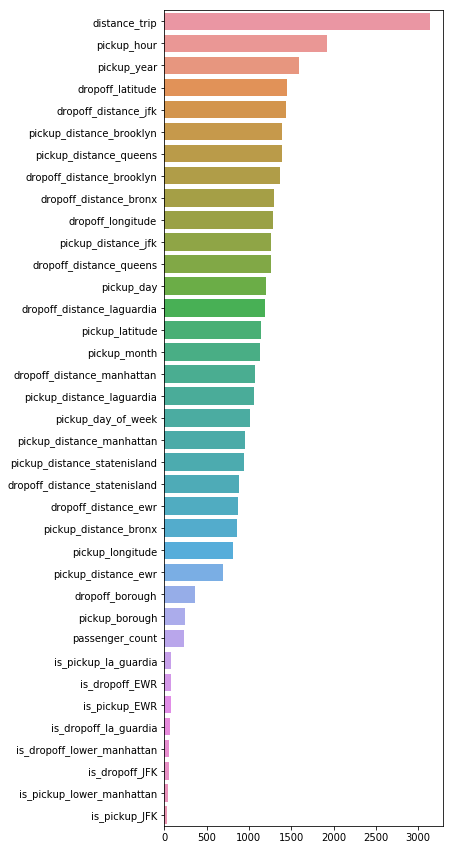

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
lgbm_feature_importance=sorted(zip(map(lambda x: round(x, 4),lgbBst.feature_importances_), xTrain.columns),reverse=True)
plt.figure(figsize=(5,15))
sns.barplot([imp for imp,feature in lgbm_feature_importance],[feature for imp,feature in lgbm_feature_importance])

RMSE for Light GBM is  3.5500112299168682
Train RMSE for Light GBM is  3.2939227248882945
Variance of Light GBM is  -0.2560885050285737


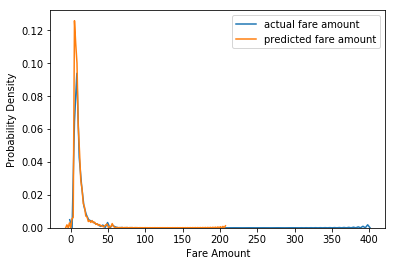

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xlabel('Fare Amount')
plt.ylabel('Probability Density')
validPred=lightGBM.predictAndEvaluateModel(lgbBst,xTest,yTest,xTrain,yTrain)
sns.kdeplot(yTest,label='actual fare amount')
sns.kdeplot(validPred,label='predicted fare amount')